In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('Advertising.csv')    # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [3]:
model1 = Lasso()
model2 = Ridge()

In [4]:
alpha_can = np.logspace(-3, 2, 10)
np.set_printoptions(suppress=True)
print ('alpha_can = ', alpha_can)
lasso_model = GridSearchCV(model1, param_grid={'alpha': alpha_can}, cv=5)
lasso_model.fit(x_train, y_train)
print ('超参数：\n', lasso_model.best_params_)
ridge_model = GridSearchCV(model2, param_grid={'alpha': alpha_can}, cv=5)
ridge_model.fit(x_train, y_train)
print ('超参数：\n', ridge_model.best_params_)

alpha_can =  [  0.001        0.00359381   0.0129155    0.04641589   0.16681005
   0.59948425   2.15443469   7.74263683  27.82559402 100.        ]
超参数：
 {'alpha': 0.5994842503189409}
超参数：
 {'alpha': 0.001}


In [5]:
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_hat = lasso_model.predict(x_test)
print (lasso_model.score(x_test, y_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print (mse, rmse)

0.9147734784738104
1.9928718663059706 1.4116911370076568


/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


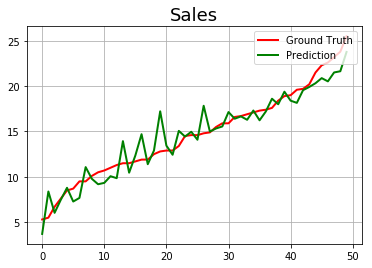

In [6]:
t = np.arange(len(x_test))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r-', linewidth=2, label='Ground Truth')
plt.plot(t, y_hat, 'g-', linewidth=2, label='Prediction')
plt.title('Sales', fontsize=18)
plt.legend(loc='upper right')
plt.grid()